Sinh dữ liệu: 300 điểm trong $R^2$, 3 loại 0,1,2 ứng với 3 màu 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

In [3]:
for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

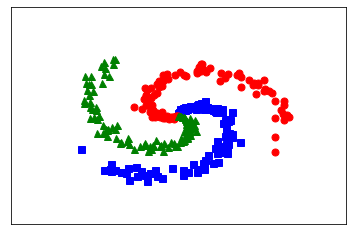

In [4]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

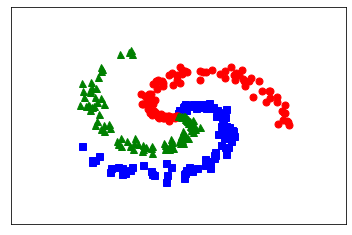

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [5]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

Chương trình chính: lớp vào 2 nút, lớp ẩn h nút, lớp ra 3 nút

In [18]:
d0 = 2
d1 = h = 50 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

In [22]:
W1

array([[-3.11563219e+00,  6.66182614e-01, -7.19147766e-02,
         4.90241749e+00,  2.00591562e+00,  2.40022960e+00,
         7.06748004e+00, -1.64224224e+00,  8.15353397e-01,
        -3.52477607e-03, -9.42803026e+00,  7.74978313e-01,
        -1.96973118e+00,  3.09345032e+00, -1.80066721e+00,
        -1.85701573e-01, -1.09887013e+00,  5.33268339e+00,
        -1.14885367e+00,  1.66536025e+00,  2.34778014e+00,
        -3.01493616e-03,  4.82681287e+00,  3.02154543e+00,
        -1.48017860e+00,  7.14756944e-01,  8.33110352e-01,
         3.96888817e-01,  1.17587868e+01, -1.58570405e+00,
         1.25952726e+00, -3.03699661e+00, -1.20318875e-01,
         1.77185083e+00,  5.55013778e-02, -1.80180120e+00,
        -1.81523377e-01,  5.47531849e-01, -2.59643218e+00,
         1.89045251e+00, -8.30942677e-01,  4.38174405e+00,
         3.40820257e+00, -9.78220223e-01, -6.11977183e-01,
        -2.21710583e-01,  1.58505008e+00,  8.99284074e-04,
        -6.93916626e-01,  8.69200236e-01],
       [ 5.51

In [19]:
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %10 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098667
iter 10, loss: 1.096744
iter 20, loss: 1.084275
iter 30, loss: 1.010536
iter 40, loss: 0.842976
iter 50, loss: 0.739019
iter 60, loss: 0.708339
iter 70, loss: 0.696604
iter 80, loss: 0.688557
iter 90, loss: 0.681562
iter 100, loss: 0.674873
iter 110, loss: 0.668114
iter 120, loss: 0.661275
iter 130, loss: 0.654960
iter 140, loss: 0.750199
iter 150, loss: 0.691113
iter 160, loss: 0.687890
iter 170, loss: 0.706206
iter 180, loss: 0.691124
iter 190, loss: 0.691645
iter 200, loss: 0.684105
iter 210, loss: 0.679347
iter 220, loss: 0.672687
iter 230, loss: 0.673115
iter 240, loss: 0.753796
iter 250, loss: 0.660618
iter 260, loss: 0.700745
iter 270, loss: 0.667803
iter 280, loss: 0.629124
iter 290, loss: 0.655710
iter 300, loss: 0.596434
iter 310, loss: 0.576763
iter 320, loss: 0.551127
iter 330, loss: 0.514478
iter 340, loss: 0.627218
iter 350, loss: 0.444261
iter 360, loss: 0.491041
iter 370, loss: 0.460951
iter 380, loss: 0.443504
iter 390, loss: 0.434930
iter 400, l

iter 3290, loss: 0.035869
iter 3300, loss: 0.035783
iter 3310, loss: 0.035698
iter 3320, loss: 0.035614
iter 3330, loss: 0.035529
iter 3340, loss: 0.035446
iter 3350, loss: 0.035363
iter 3360, loss: 0.035280
iter 3370, loss: 0.035199
iter 3380, loss: 0.035118
iter 3390, loss: 0.035037
iter 3400, loss: 0.034958
iter 3410, loss: 0.034879
iter 3420, loss: 0.034801
iter 3430, loss: 0.034723
iter 3440, loss: 0.034646
iter 3450, loss: 0.034569
iter 3460, loss: 0.034493
iter 3470, loss: 0.034417
iter 3480, loss: 0.034342
iter 3490, loss: 0.034267
iter 3500, loss: 0.034192
iter 3510, loss: 0.034119
iter 3520, loss: 0.034045
iter 3530, loss: 0.033972
iter 3540, loss: 0.033900
iter 3550, loss: 0.033828
iter 3560, loss: 0.033757
iter 3570, loss: 0.033686
iter 3580, loss: 0.033616
iter 3590, loss: 0.033546
iter 3600, loss: 0.033477
iter 3610, loss: 0.033408
iter 3620, loss: 0.033339
iter 3630, loss: 0.033271
iter 3640, loss: 0.033204
iter 3650, loss: 0.033137
iter 3660, loss: 0.033070
iter 3670, l

iter 6610, loss: 0.022950
iter 6620, loss: 0.022932
iter 6630, loss: 0.022914
iter 6640, loss: 0.022896
iter 6650, loss: 0.022878
iter 6660, loss: 0.022860
iter 6670, loss: 0.022842
iter 6680, loss: 0.022824
iter 6690, loss: 0.022807
iter 6700, loss: 0.022789
iter 6710, loss: 0.022772
iter 6720, loss: 0.022754
iter 6730, loss: 0.022737
iter 6740, loss: 0.022719
iter 6750, loss: 0.022702
iter 6760, loss: 0.022685
iter 6770, loss: 0.022667
iter 6780, loss: 0.022650
iter 6790, loss: 0.022633
iter 6800, loss: 0.022616
iter 6810, loss: 0.022599
iter 6820, loss: 0.022582
iter 6830, loss: 0.022565
iter 6840, loss: 0.022548
iter 6850, loss: 0.022532
iter 6860, loss: 0.022515
iter 6870, loss: 0.022498
iter 6880, loss: 0.022482
iter 6890, loss: 0.022465
iter 6900, loss: 0.022449
iter 6910, loss: 0.022432
iter 6920, loss: 0.022416
iter 6930, loss: 0.022400
iter 6940, loss: 0.022383
iter 6950, loss: 0.022367
iter 6960, loss: 0.022351
iter 6970, loss: 0.022335
iter 6980, loss: 0.022319
iter 6990, l

iter 9900, loss: 0.019063
iter 9910, loss: 0.019055
iter 9920, loss: 0.019047
iter 9930, loss: 0.019040
iter 9940, loss: 0.019032
iter 9950, loss: 0.019024
iter 9960, loss: 0.019017
iter 9970, loss: 0.019009
iter 9980, loss: 0.019001
iter 9990, loss: 0.018993


In thử trọng số

In [14]:
print(W1)

[[ 0.90203675 -1.22056746 -0.29834118 -0.20411774  0.03966303]
 [ 2.03265835  1.14509103  0.36212001  0.58340827  0.17234494]]


Độ chính xác theo accuracy

In [20]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

training accuracy: 99.33 %
